In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
normalized_etf_monthly = pd.read_csv('../variables_of_interest/normalized_etf_monthly.csv', index_col=0).reset_index(drop=True)
normalized_etf_monthly['Date'] = pd.to_datetime(normalized_etf_monthly['Year'].astype(str) + normalized_etf_monthly['Month'].astype(str), format='%Y%m')
normalized_etf_monthly.drop(['Year', 'Month'], axis=1, inplace=True)
#normalized_etf_monthly['Range'] = normalized_etf_monthly['Price'].astype(str) + '-' + normalized_etf_monthly['Volatility'].astype(str)
etfs = list(normalized_etf_monthly['ETF'].unique())
normalized_etf_monthly

,ETF,Price,Volatility,Date
0,Agri_Machinery_ETF,36.835142,18.702643,1999-11-01
1,Food_Beverage_ETF,40.019708,16.961994,1999-11-01
2,Investment_Funds_ETF,125.522357,22.170051,1999-11-01
3,Restaurant_FastFood_ETF,34.920701,12.464929,1999-11-01
4,Retail_ETF,17.868213,0.000000,1999-11-01
...,...,...,...,...
1455,Agri_Machinery_ETF,277.317478,133.030308,2024-02-01
1456,Food_Beverage_ETF,421.236543,269.684486,2024-02-01
1457,Investment_Funds_ETF,391.489413,197.982956,2024-02-01
1458,Restaurant_FastFood_ETF,1607.725593,860.478030,2024-02-01


In [41]:
etfs

['Agri_Machinery_ETF',
 'Food_Beverage_ETF',
 'Investment_Funds_ETF',
 'Restaurant_FastFood_ETF',
 'Retail_ETF']

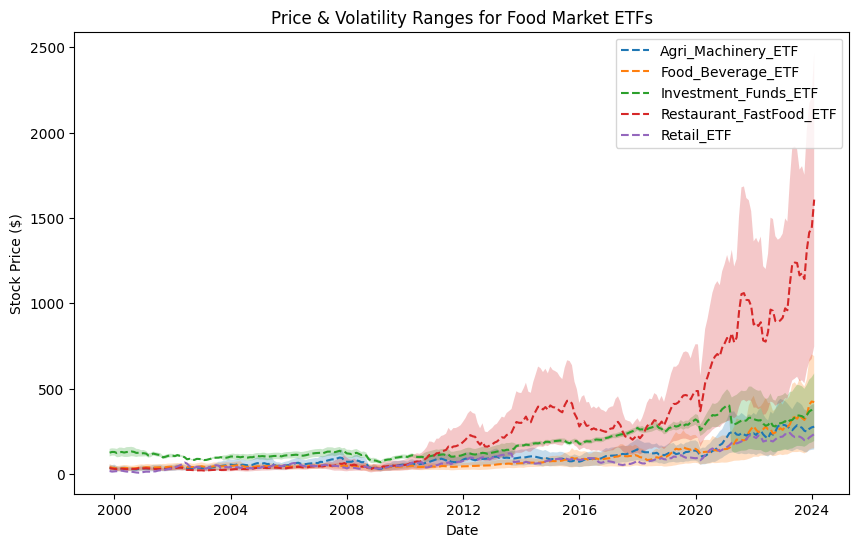

In [40]:
plt.figure(figsize=(10, 6))
for etf, group in normalized_etf_monthly.groupby('ETF'):
    plt.plot(group['Date'], group['Price'], label=etf, linestyle='dashed')
    plt.fill_between(group['Date'], group['Price'] - group['Volatility'], group['Price'] +  group['Volatility'], alpha=0.25, linestyle='dashed')
    #plt.plot(by_etf_monthly.index, by_etf_monthly[etf], label=etf)

plt.title('Price & Volatility Ranges for Food Market ETFs')
plt.ylabel('Stock Price ($)')
plt.xlabel('Date')
plt.legend()
plt.show()

In [61]:
price_change = normalized_etf_monthly.pivot(index='Date', columns='ETF', values='Price')
baseline = price_change.iloc[0]
percent_change = price_change.apply(lambda x: (x - baseline) / baseline, axis=1)
percent_change.drop(percent_change.index[0], inplace=True)
index_perf = percent_change.pop('Investment_Funds_ETF')
relative_perf = percent_change.apply(lambda x: x / index_perf if index_perf is not None else 0, axis=0)

In [64]:
relative_perf.to_csv('../variables_of_interest/relative_etf_performance.csv')
relative_perf

ETF,Agri_Machinery_ETF,Food_Beverage_ETF,Restaurant_FastFood_ETF,Retail_ETF
Date,,,,
1999-12-01,-1.557309,-2.206914,-2.212332,-5.851046
2000-01-01,0.273289,-3.672914,-4.478692,-3.848100
2000-02-01,8.017218,9.727031,10.089114,3.519274
2000-03-01,-13.340422,-13.232104,-10.415068,3.495222
2000-04-01,-4.039071,-4.667150,-3.468667,3.704729
...,...,...,...,...
2023-10-01,3.617303,4.252479,19.500157,6.218712
2023-11-01,3.287741,4.309151,20.892080,5.800929
2023-12-01,3.224786,4.781845,20.584632,5.719173
